# tf.ipynb
Reference: https://realpython.com/python-scipy-fft/

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy import signal
from scipy.fft import rfft, rfftfreq
from icecream import ic

In [34]:
def create_square_wav(filepath, sample_rate, frequency, duration):
    """ 
    Creates and saves a WAV file. Data saved as np.float32 (-1.0 - 1.0)
    """
    t = np.linspace(0, duration, sample_rate, endpoint=False)
    square_wave = signal.square(2 * np.pi * frequency * t)
    wavfile.write(filepath, sample_rate, square_wave.astype(np.float32))

# create_square_wav(
#     filepath='square_wave.wav',
#     sample_rate=500,
#     frequency=10,
#     duration=1)

In [37]:
def plot_time_frequency(wavefile_path):
    """
    Plots a WAV file in time domain and frequency domain.
    The figure and its 2 sets of axes are returned so that these objects can be modified.
    """

    # Read WAV file
    samplerate, data = wavfile.read(wavefile_path)
    ic(samplerate)
    ic(data.shape)
    duration = data.shape[0] / samplerate
    time = np.linspace(0., duration, data.shape[0])

    # Perform FFT and calculate frequency array
    power = np.abs(rfft(data))
    freq = rfftfreq(data.shape[0], 1/sample_rate)
    
    # Create plot
    fig, (axt, axf) = plt.subplots(2, 1, constrained_layout=1, figsize=(7, 7))

    axt.plot(time, data, lw=1)
    axt.set_xlabel('time (s)')
    axt.set_ylabel('amplitude')

    axf.plot(freq, power, lw=1)
    axf.set_xlabel('frequency (Hz)')
    axf.set_ylabel('amplitude')
    axf.fill_between(freq, power)
    
    return fig, (axt, axf)

# wavefile_path = 'square_wave.wav'        
# fig, (axt, axf) = plot_time_frequency(wavefile_path)
# fig.suptitle(f'{wavefile_path} | fundamental freqency = ???')
# axf.set_xlim(0, 100)

ic| samplerate: 6000


ic| data.shape: (718,)


(<Figure size 700x700 with 2 Axes>,
 (<Axes: xlabel='time (s)', ylabel='amplitude'>,
  <Axes: xlabel='frequency (Hz)', ylabel='amplitude'>))

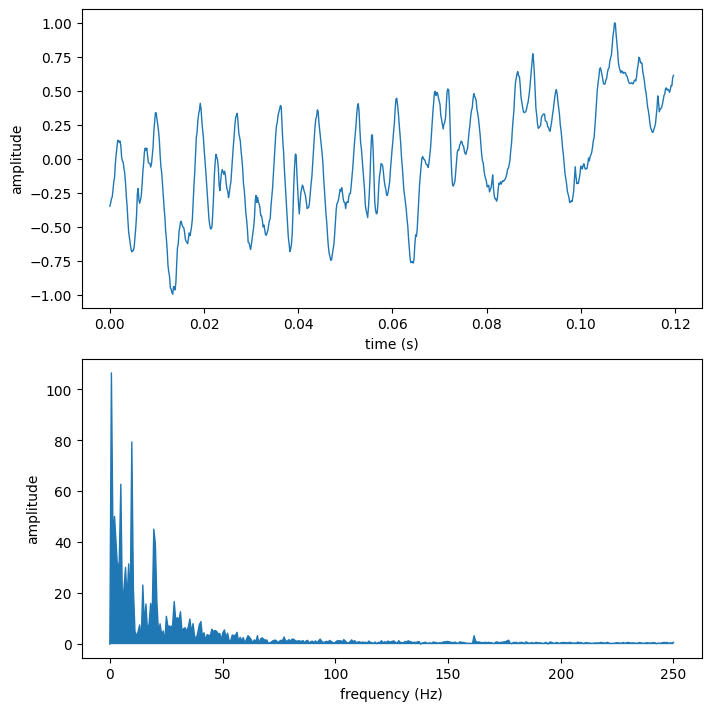

In [38]:
plot_time_frequency('beetle.wav')